<a href="https://colab.research.google.com/github/SaiVandana-11/Projects/blob/main/Fruit_Classification_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score,
    classification_report
)

In [ ]:
# Load the csv and print the first rows

from google.colab import files
uploaded = files.upload()

Saving fruit_classify.csv to fruit_classify (1).csv


In [ ]:
df = pd.read_csv('fruit_classify.csv')

print(df.head(20))

    weight  diameter  fruit_type
0       87  7.170060           0
1      126  2.044054           1
2      172  8.526692           2
3        5  2.280952           3
4      132  6.134677           0
5      118  2.715628           1
6      176  8.278834           2
7       19  2.777318           3
8      102  9.467734           0
9      109  3.171730           1
10     191  7.663972           2
11       8  2.365234           3
12      93  7.852691           0
13     145  3.645070           1
14     143  6.869910           2
15      18  2.040340           3
16     156  9.667167           0
17     107  2.542819           1
18     150  6.852822           2
19       6  2.647556           3


In [ ]:
# check for missing values
print(df.isnull().sum())

# general info
print(df.info())

# summary statistics
print(df.describe())

# analyzing the target variable
print()
print(df['fruit_type'].value_counts())

weight        0
diameter      0
fruit_type    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   weight      500 non-null    int64  
 1   diameter    500 non-null    float64
 2   fruit_type  500 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 11.8 KB
None
           weight    diameter  fruit_type
count  500.000000  500.000000  500.000000
mean   109.806000    5.137717    1.500000
std     61.662573    2.825973    1.119154
min      5.000000    1.019848    0.000000
25%     65.750000    2.453018    0.750000
50%    128.000000    4.979037    1.500000
75%    151.000000    7.850936    2.250000
max    200.000000    9.965312    3.000000

fruit_type
0    125
1    125
2    125
3    125
Name: count, dtype: int64


We can see that the dataset is well balanced, there is no missing values and the dataset contains 500 observations. The fruit_type is already encoded so we don't have to worry about that or change anything.

For clarity and usefullness of data it would be required to know what the encoded values of the fruit_type represent. It could also be misinterpreted by models to consider numberic labels for the field fruit_type because there is no particular order to the feature fruit_type but in this data it has been labelled in a numeric order (this is what one-hot encoding is used for).

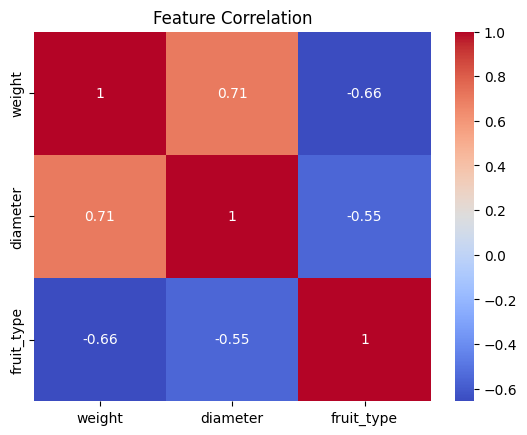

In [ ]:
# Correlation matrix visualisation
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

We see that the weight and the diameter are highly correlated variables. In cases of too much data and situations in which we need to reduce dimensionality, this must be kept in mind.

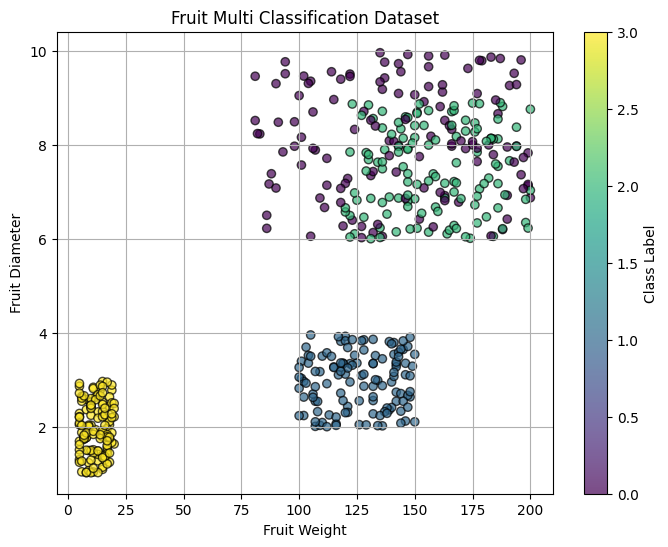

In [ ]:
# Defining the variables

X = df[['weight', 'diameter']]
Y = df['fruit_type']

# Plotting the dataset

plt.figure(figsize=(8,6))
plt.scatter(df['weight'], df['diameter'], c=df['fruit_type'], cmap='viridis', alpha=0.7, edgecolors='k')
plt.xlabel("Fruit Weight")
plt.ylabel("Fruit Diameter")
plt.title("Fruit Multi Classification Dataset")
plt.colorbar(label="Class Label")
plt.grid(True)
plt.show()

Plotting the data based now on the model created to visualize decision boundaries.

In [ ]:
# Split data into training and test sets

X_train, X_mid, Y_train, Y_mid = train_test_split(X, Y, test_size = 0.4, random_state = 2106)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_mid, Y_mid, test_size = 0.5, random_state = 2106)

In [ ]:
# Normalisation using standardisation (using mean and standard deviation)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### Implementing Multi-Class Logistic Regression

In [ ]:
# Testing Logistic Regression on the data

model = LogisticRegression(solver = 'lbfgs', max_iter = 1000, random_state = 2106)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=2106)

In [ ]:
# Predicting X train and X validation accuracy

Y_train_pred = model.predict(X_train)
acc_train = accuracy_score(Y_train, Y_train_pred)
print(f"Train Accuracy - Logistic Regression: {acc_train:.2f}")

Y_valid_pred = model.predict(X_valid)
acc_valid = accuracy_score(Y_valid, Y_valid_pred)
print(f"Validation Accuracy - Logistic Regression: {acc_valid:.2f}")

Train Accuracy - Logistic Regression: 0.81
Validation Accuracy - Logistic Regression: 0.79


In [ ]:
# Predicting X test accuracy

Y_test_pred = model.predict(X_test)
acc_test = accuracy_score(Y_test, Y_test_pred)
print(f"Test Accuracy - Logistic Regression: {acc_test:.2f}")

Test Accuracy - Logistic Regression: 0.85


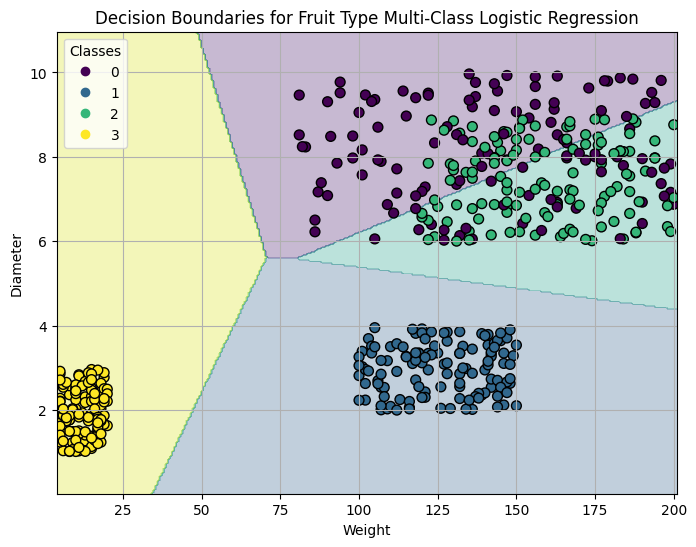

In [ ]:
# Extract features and labels
X_val = df[['weight', 'diameter']].values
Y_val = df['fruit_type'].values

# Train multinomial logistic regression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_val, Y_val)

# Define a grid for contour plot
x_min, x_max = X_val[:, 0].min() - 1, X_val[:, 0].max() + 1
y_min, y_max = X_val[:, 1].min() - 1, X_val[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict labels for each point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])  # Ensure correct shape
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')  # Colored decision regions

# Overlay training points
scatter = plt.scatter(X_val[:, 0], X_val[:, 1], c=Y, cmap='viridis', edgecolors='k', s=50)

# Fix the legend handling to prevent NumPy truth value error
handles, labels = scatter.legend_elements()
unique_classes = np.unique(Y)  # Ensure unique labels

plt.xlabel("Weight")
plt.ylabel("Diameter")
plt.title("Decision Boundaries for Fruit Type Multi-Class Logistic Regression")
plt.legend(handles, [str(label) for label in unique_classes], title="Classes")  # Fix legend format
plt.grid(True)
plt.show()

### Implementing SVM

In [ ]:
# Testing SVM on the data

model2 =  svm.SVC(C = 1.0, kernel = "rbf", gamma = "scale", probability = False, random_state = 2106)
model2.fit(X_train, Y_train)

SVC(random_state=2106)

In [ ]:
# Predicting X train and X validation accuracy
Y_train_pred_svm = model2.predict(X_train)
acc_train_svm = accuracy_score(Y_train, Y_train_pred_svm)
print(f"Train Accuracy - SVM: {acc_train_svm:.2f}")

Y_valid_pred_svm = model2.predict(X_valid)
acc_valid_svm = accuracy_score(Y_valid, Y_valid_pred_svm)
print(f"Validation Accuracy - SVM: {acc_valid_svm:.2f}")

Train Accuracy - SVM: 0.85
Validation Accuracy - SVM: 0.80


In [ ]:
# Predicting X test accuracy

Y_test_pred_svm = model2.predict(X_test)
acc_test_svm = accuracy_score(Y_test, Y_test_pred_svm)
print(f"Test Accuracy - SVM: {acc_test_svm:.2f}")

Test Accuracy - SVM: 0.94


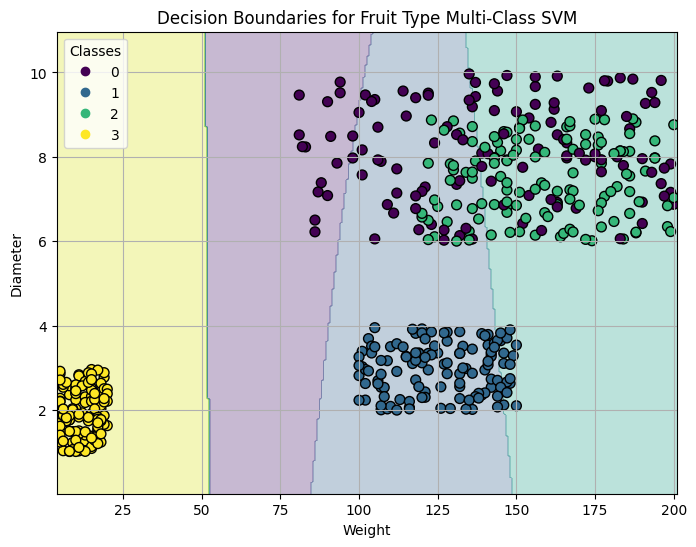

In [ ]:
# Extract features and labels
X_val = df[['weight', 'diameter']].values
Y_val = df['fruit_type'].values

# Train svm
model2.fit(X_val, Y_val)

# Define a grid for contour plot
x_min, x_max = X_val[:, 0].min() - 1, X_val[:, 0].max() + 1
y_min, y_max = X_val[:, 1].min() - 1, X_val[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict labels for each point in the grid
Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])  # Ensure correct shape
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')  # Colored decision regions

# Overlay training points
scatter = plt.scatter(X_val[:, 0], X_val[:, 1], c=Y, cmap='viridis', edgecolors='k', s=50)

# Fix the legend handling to prevent NumPy truth value error
handles, labels = scatter.legend_elements()
unique_classes = np.unique(Y)  # Ensure unique labels

plt.xlabel("Weight")
plt.ylabel("Diameter")
plt.title("Decision Boundaries for Fruit Type Multi-Class SVM")
plt.legend(handles, [str(label) for label in unique_classes], title="Classes")  # Fix legend format
plt.grid(True)
plt.show()

### Implementing Random Forest Classifier

In [ ]:
# Testing Random Forest on the data

model3 = RandomForestClassifier(
    n_estimators = 500,               # more trees for better learning
    max_depth = 10,                   # optimum tree depth
    min_samples_split = 3,            # use splits to capture finer patterns
    min_samples_leaf = 2,             # prevent overfitting
    random_state = 2106
    )
model3.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=500, random_state=2106)

In [ ]:
# Predicting X train and X validation accuracy
Y_train_pred_rf = model3.predict(X_train)
acc_train_rf = accuracy_score(Y_train, Y_train_pred_rf)
print(f"Train Accuracy - Random Forest: {acc_train_rf:.2f}")

Y_valid_pred_rf = model3.predict(X_valid)
acc_valid_rf = accuracy_score(Y_valid, Y_valid_pred_rf)
print(f"Validation Accuracy - Random Forest: {acc_valid_rf:.2f}")

Train Accuracy - Random Forest: 0.96
Validation Accuracy - Random Forest: 0.81


In [ ]:
# Predicting X test accuracy

Y_test_pred_rf = model3.predict(X_test)
acc_test_rf = accuracy_score(Y_test, Y_test_pred_rf)
print(f"Test Accuracy - Random Forest: {acc_test_rf}")

Test Accuracy - Random Forest: 0.94


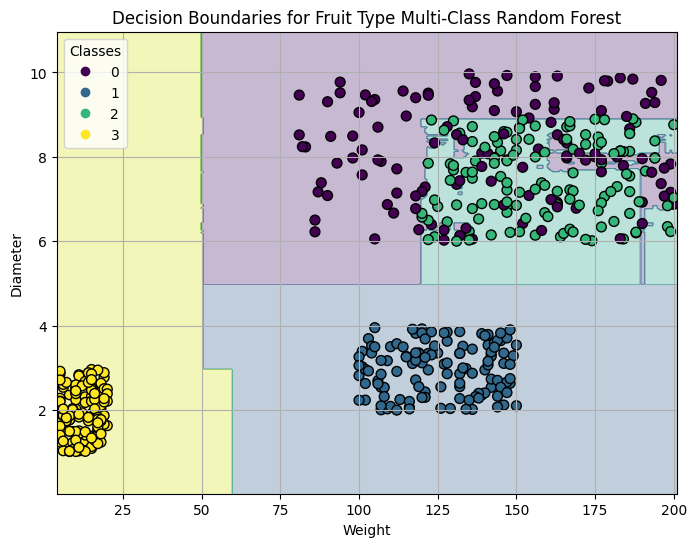

In [ ]:
# Extract features and labels
X_val = df[['weight', 'diameter']].values
Y_val = df['fruit_type'].values

# Train Random Forest Classifier
model3.fit(X_val, Y_val)

# Define a grid for contour plot
x_min, x_max = X_val[:, 0].min() - 1, X_val[:, 0].max() + 1
y_min, y_max = X_val[:, 1].min() - 1, X_val[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict labels for each point in the grid
Z = model3.predict(np.c_[xx.ravel(), yy.ravel()])  # Ensure correct shape
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')  # Colored decision regions

# Overlay training points
scatter = plt.scatter(X_val[:, 0], X_val[:, 1], c=Y, cmap='viridis', edgecolors='k', s=50)

# Fix the legend handling to prevent NumPy truth value error
handles, labels = scatter.legend_elements()
unique_classes = np.unique(Y)  # Ensure unique labels

plt.xlabel("Weight")
plt.ylabel("Diameter")
plt.title("Decision Boundaries for Fruit Type Multi-Class Random Forest")
plt.legend(handles, [str(label) for label in unique_classes], title="Classes")  # Fix legend format
plt.grid(True)
plt.show()

### Implementing XGB Classifier

In [ ]:
# Testing XGBClassifier on the data

model4 = XGBClassifier(
    n_estimators = 300,             # more trees for better learning
    max_depth = 10,                 # optimum tree depth
    learning_rate = 0.05,           # manage contribution of each tree
    random_state = 2106
)

model4.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Predicting X train and X validation accuracy

Y_train_pred_xgb = model4.predict(X_train)
acc_train_xgb = accuracy_score(Y_train, Y_train_pred_xgb)
print(f"Train Accuracy - XGBoost: {acc_train_xgb:.2f}")

Y_valid_pred_xgb = model4.predict(X_valid)
acc_valid_xgb = accuracy_score(Y_valid, Y_valid_pred_xgb)
print(f"Validation Accuracy - XGBoost: {acc_valid_xgb:.2f}")

Train Accuracy - XGBoost: 1.00
Validation Accuracy - XGBoost: 0.79


In [ ]:
# Predicting X test accuracy

Y_test_pred_xgb = model4.predict(X_test)
acc_test_xgb = accuracy_score(Y_test, Y_test_pred_xgb)
print(f"Test Accuracy - XGBoost: {acc_test_xgb:.2f}")

Test Accuracy - XGBoost: 0.97


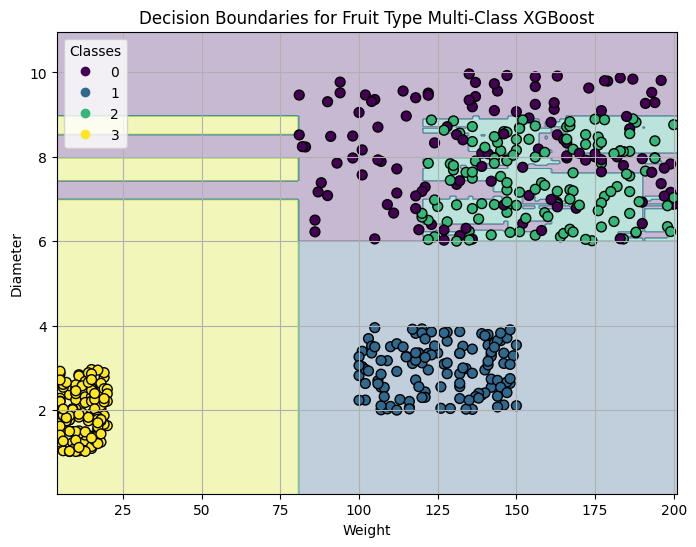

In [ ]:
# Extract features and labels
X_val = df[['weight', 'diameter']].values
Y_val = df['fruit_type'].values

# Train XGBoost
model4.fit(X_val, Y_val)

# Define a grid for contour plot
x_min, x_max = X_val[:, 0].min() - 1, X_val[:, 0].max() + 1
y_min, y_max = X_val[:, 1].min() - 1, X_val[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict labels for each point in the grid
Z = model4.predict(np.c_[xx.ravel(), yy.ravel()])  # Ensure correct shape
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')  # Colored decision regions

# Overlay training points
scatter = plt.scatter(X_val[:, 0], X_val[:, 1], c=Y, cmap='viridis', edgecolors='k', s=50)

# Fix the legend handling to prevent NumPy truth value error
handles, labels = scatter.legend_elements()
unique_classes = np.unique(Y)  # Ensure unique labels

plt.xlabel("Weight")
plt.ylabel("Diameter")
plt.title("Decision Boundaries for Fruit Type Multi-Class XGBoost")
plt.legend(handles, [str(label) for label in unique_classes], title="Classes")  # Fix legend format
plt.grid(True)
plt.show()

From these tests we see that the accuracy is best between Random Forest Classifier and XGB Classifier. Although the training set and the testing set have a higher prediction accuracy for XGBoost, the validation set accuracy goes below 80% for this model. Hence the most dependable model to consider might be the Random Forest Classifier model for new data point prediction. From the graphical boundaries we also see that XGBoost might be overfitting the data too much.